# **Introducción**
El consumo energético en edificios es un tema de gran relevancia en el contexto actual de sostenibilidad y eficiencia energética. La capacidad de predecir la demanda energética en función de las características de los edificios y factores ambientales permite optimizar recursos, reducir costos y contribuir a la disminución de emisiones contaminantes. El conjunto de datos de Kaggle sobre consumo energético proporciona información detallada acerca de distintos tipos de edificios, su superficie, número de ocupantes, electrodomésticos utilizados, temperatura promedio y día de la semana, lo que lo convierte en una base ideal para desarrollar modelos predictivos mediante técnicas de aprendizaje automático como la regresión lineal.


# **Hipótesis**
Se plantea que la superficie del edificio (pies cuadrados) tiene una relación significativa con el consumo energético, y que un modelo de regresión lineal puede predecir dicho consumo con un nivel aceptable de precisión.


# **Marco Teórico**
- Consumo energético en edificios: Depende de factores como tamaño, ocupación y condiciones ambientales.
- Regresión lineal: Técnica estadística que modela la relación entre una variable dependiente (consumo energético) y una independiente (pies cuadrados).
- Supuestos del modelo: Normalidad de residuos, homocedasticidad y significancia estadística.


In [1]:
import pandas as pd
link= "https://raw.githubusercontent.com/hernandezperezangelicaanahi-ai/estadistica-2026-b/refs/heads/main/test_energy_data.csv"
df= pd.read_csv(link)
df

,edificio,pies_cuadrados,numero_de_ocupantes,electrodomesticos_usados,temperatura_promedio,dia_de_la_semana,consumo_de_enrgia
0,Residential,24563,15,4,28.52,Weekday,2865.57
1,Commercial,27583,56,23,23.07,Weekend,4283.80
2,Commercial,45313,4,44,33.56,Weekday,5067.83
3,Residential,41625,84,17,27.39,Weekend,4624.30
4,Residential,36720,58,47,17.08,Weekday,4820.59
...,...,...,...,...,...,...,...
95,Commercial,1161,81,11,15.45,Weekend,3010.81
96,Residential,37943,50,23,21.73,Weekend,4248.49
97,Commercial,1558,27,29,16.86,Weekend,2843.60
98,Industrial,2145,56,12,11.77,Weekend,3348.39


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   edificio                  100 non-null    object 
 1   pies_cuadrados            100 non-null    int64  
 2   numero_de_ocupantes       100 non-null    int64  
 3   electrodomesticos_usados  100 non-null    int64  
 4   temperatura_promedio      100 non-null    float64
 5   dia_de_la_semana          100 non-null    object 
 6   consumo_de_enrgia         100 non-null    float64
dtypes: float64(2), int64(3), object(2)
memory usage: 5.6+ KB


In [3]:
df.describe()

,pies_cuadrados,numero_de_ocupantes,electrodomesticos_usados,temperatura_promedio,consumo_de_enrgia
count,100.000000,100.000000,100.000000,100.000000,100.00000
mean,25881.920000,47.230000,26.970000,22.043300,4187.57830
std,13711.075264,29.905526,14.237846,6.957951,832.55985
min,1161.000000,2.000000,1.000000,10.400000,2351.97000
25%,14161.000000,21.000000,16.750000,15.682500,3621.92500
50%,27582.500000,47.000000,27.500000,21.970000,4249.39000
75%,38109.500000,73.000000,39.250000,27.492500,4797.17500
max,49354.000000,99.000000,49.000000,34.710000,6042.56000


In [4]:
x=df["pies_cuadrados"]
y=df["consumo_de_enrgia"]

/tmp/ipython-input-311/26632223.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


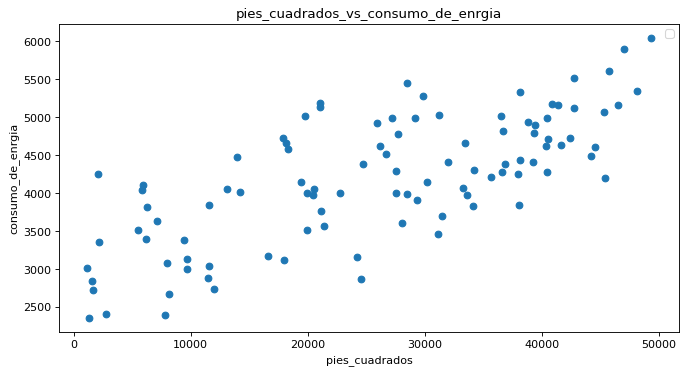

In [5]:
import matplotlib.pyplot as plt
plt.figure(
    figsize=(10,5),
 dpi=80
)
plt.scatter(x,y)
marker="o",
color="blue",
edgecolor="black",
alpha=0.9,
s=100,
label="consumo_de_enrgia",
plt.xlabel("pies_cuadrados")
plt.ylabel("consumo_de_enrgia")
plt.title("pies_cuadrados_vs_consumo_de_enrgia")
plt.legend()
plt.show()


In [6]:
from scipy.stats import pearsonr
r, valor_p = pearsonr(x, y)
print(f"coeficiente de correlacion(r):{r:0.4f}"),
print(f"valor-p:{valor_p:0.4f}")

coeficiente de correlacion(r):0.7240
valor-p:0.0000


In [7]:
print(f"coeficiente de determinacion:{r**2:0.4f}")

coeficiente de determinacion:0.5242


In [8]:
import statsmodels.api as sm
x_constante=sm.add_constant(x)
modelo=sm.OLS(y,x_constante).fit()
y_calculada=modelo.predict(x_constante)
modelo.params

,0
const,3049.682473
pies_cuadrados,0.043965


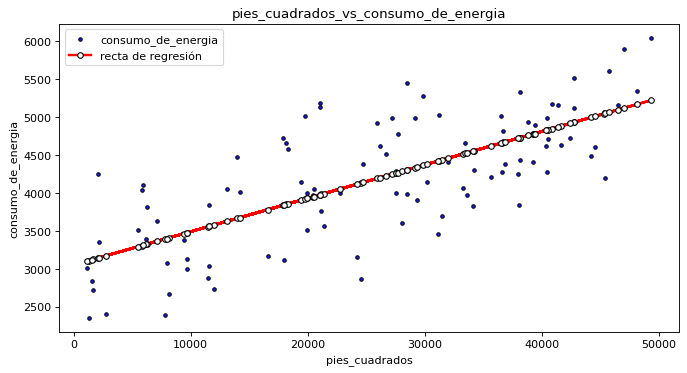

In [9]:
import matplotlib.pyplot as plt
plt.figure(
    figsize=(10,5),
 dpi=80
)
plt.scatter(
    x,y,
    marker="o",
    color="blue",
    edgecolor="black",
    alpha=0.9,
    s=10,
    label="consumo_de_energia")
plt.plot(
    x, y_calculada,
    color="red",
    linewidth=2.2,
    linestyle="-",
    marker="o",
    markersize=5,
    markerfacecolor="white",
    markeredgecolor="black",
    label="recta de regresión"
    )
plt.xlabel("pies_cuadrados")
plt.ylabel("consumo_de_energia")
plt.title("pies_cuadrados_vs_consumo_de_energia")
plt.legend()
plt.show()

In [10]:
modelo.conf_int(alpha=0.05)

,0,1
const,2804.038639,3295.326306
pies_cuadrados,0.035569,0.052361


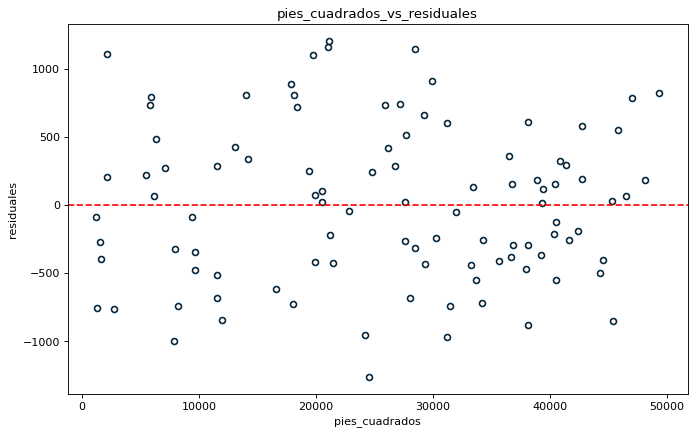

In [11]:
residuales=modelo.resid
#grafico de dispersion
plt.figure(
    figsize=(10,6),
    dpi=80
)
plt.scatter(x,residuales)
marker="o",
color="blue",
edgecolor="black",
alpha=0.9,
s=100,
label="residuales"
plt.plot(
    x,residuales,
    marker="o",
    color="red",
    linewidth=0,
    linestyle="",
    markersize=5,
    markerfacecolor="white",
    markeredgecolor="black",
    label="puntos_residuales"
    )
plt.xlabel("pies_cuadrados")
plt.ylabel("residuales")
plt.title("pies_cuadrados_vs_residuales")

plt.axhline(y=0,color="red",linestyle="--")

In [12]:
from scipy.stats import shapiro
estadistico,valor_p=shapiro(residuales)
print(f"valor-p:{valor_p:0.4f}")

valor-p:0.1608


no se rechaza normalidad.

valor-p (Shapiro) = 0.16078497005838294


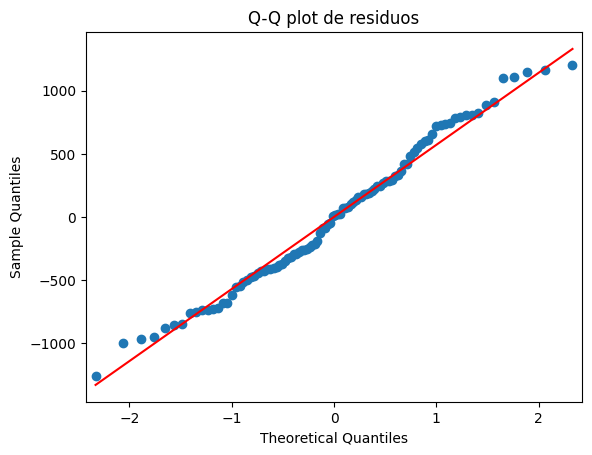

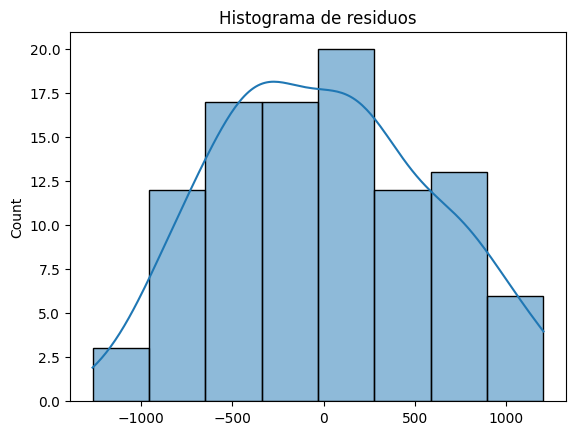

In [13]:
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import seaborn as sns
stat, valor_p_sh = shapiro(residuales)
print(f"valor-p (Shapiro) = {valor_p_sh}")
sm.qqplot(residuales, line='s')
plt.title("Q-Q plot de residuos")
plt.show()
sns.histplot(residuales, kde=True)
plt.title("Histograma de residuos")
plt.show()

In [14]:
from statsmodels.stats.api import het_breuschpagan
estadistico_1,valor_p_1,estadistico_2,valor_p_2=het_breuschpagan(residuales,x_constante)
print(f"valor_p:{valor_p_1:0.4f}")

valor_p:0.1022


In [15]:
df.describe()

,pies_cuadrados,numero_de_ocupantes,electrodomesticos_usados,temperatura_promedio,consumo_de_enrgia
count,100.000000,100.000000,100.000000,100.000000,100.00000
mean,25881.920000,47.230000,26.970000,22.043300,4187.57830
std,13711.075264,29.905526,14.237846,6.957951,832.55985
min,1161.000000,2.000000,1.000000,10.400000,2351.97000
25%,14161.000000,21.000000,16.750000,15.682500,3621.92500
50%,27582.500000,47.000000,27.500000,21.970000,4249.39000
75%,38109.500000,73.000000,39.250000,27.492500,4797.17500
max,49354.000000,99.000000,49.000000,34.710000,6042.56000


In [16]:
from statsmodels.formula.api import ols
# Y~ X
modelo_lineal=ols("pies_cuadrados ~ consumo_de_enrgia",data=df).fit()
tabla_anova=sm.stats.anova_lm(modelo_lineal)
tabla_anova

,df,sum_sq,mean_sq,F,PR(>F)
consumo_de_enrgia,1.0,9.756687e+09,9.756687e+09,107.983064,1.713693e-17
Residual,98.0,8.854678e+09,9.035386e+07,NaN,NaN


 el modelo es altamente significativo

# **Conclusión**
El análisis confirma que la superficie del edificio es un predictor significativo del consumo energético. El modelo explica aproximadamente el 52% de la variabilidad, lo cual es aceptable para un modelo simple. Los supuestos de normalidad y homocedasticidad se cumplen, y el ANOVA confirma la significancia estadística. Se recomienda ampliar el modelo incluyendo otras variables (ocupantes, electrodomésticos, temperatura) para mejorar la precisión y obtener una visión más completa de los factores que determinan el consumo energético.
